In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [2]:
#Set Psudeorandom Seed
seed = 42

In [3]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/con_2.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [4]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:45]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [5]:
recall = []
f1 = []

In [6]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))


0.8681672025723473
[[964 150]
 [ 14 116]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1114
           1       0.44      0.89      0.59       130

    accuracy                           0.87      1244
   macro avg       0.71      0.88      0.75      1244
weighted avg       0.93      0.87      0.89      1244



In [8]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9236334405144695
[[1070   44]
 [  51   79]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1114
           1       0.64      0.61      0.62       130

    accuracy                           0.92      1244
   macro avg       0.80      0.78      0.79      1244
weighted avg       0.92      0.92      0.92      1244



In [9]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.952572347266881
[[1101   13]
 [  46   84]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1114
           1       0.87      0.65      0.74       130

    accuracy                           0.95      1244
   macro avg       0.91      0.82      0.86      1244
weighted avg       0.95      0.95      0.95      1244



In [10]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9308681672025724
[[1072   42]
 [  44   86]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1114
           1       0.67      0.66      0.67       130

    accuracy                           0.93      1244
   macro avg       0.82      0.81      0.81      1244
weighted avg       0.93      0.93      0.93      1244



In [11]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9011254019292605
[[1114    0]
 [ 123    7]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1114
           1       1.00      0.05      0.10       130

    accuracy                           0.90      1244
   macro avg       0.95      0.53      0.52      1244
weighted avg       0.91      0.90      0.86      1244



In [12]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9421221864951769
[[1103   11]
 [  61   69]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1114
           1       0.86      0.53      0.66       130

    accuracy                           0.94      1244
   macro avg       0.91      0.76      0.81      1244
weighted avg       0.94      0.94      0.94      1244



In [13]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.887459807073955
[[1012  102]
 [  38   92]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1114
           1       0.47      0.71      0.57       130

    accuracy                           0.89      1244
   macro avg       0.72      0.81      0.75      1244
weighted avg       0.91      0.89      0.90      1244



In [14]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9477491961414791
[[1104   10]
 [  55   75]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1114
           1       0.88      0.58      0.70       130

    accuracy                           0.95      1244
   macro avg       0.92      0.78      0.83      1244
weighted avg       0.95      0.95      0.94      1244



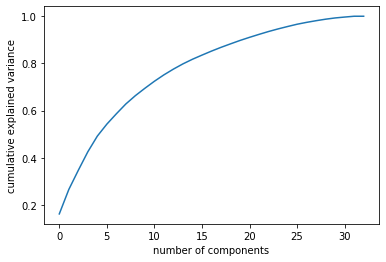

In [15]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [17]:
pca.n_components_

15

In [18]:
pca.explained_variance_ratio_

array([0.16238404, 0.10345847, 0.08146069, 0.07831484, 0.06649943,
       0.0507053 , 0.04385816, 0.04169643, 0.03518225, 0.03123971,
       0.02972402, 0.02712395, 0.02436446, 0.02216784, 0.01956704])

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.16238404, 0.26584251, 0.3473032 , 0.42561804, 0.49211747,
       0.54282276, 0.58668093, 0.62837736, 0.66355961, 0.69479932,
       0.72452335, 0.7516473 , 0.77601176, 0.7981796 , 0.81774664])

In [20]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [21]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8641479099678456
[[961 153]
 [ 16 114]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1114
           1       0.43      0.88      0.57       130

    accuracy                           0.86      1244
   macro avg       0.71      0.87      0.75      1244
weighted avg       0.93      0.86      0.88      1244



In [22]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8561093247588425
[[952 162]
 [ 17 113]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1114
           1       0.41      0.87      0.56       130

    accuracy                           0.86      1244
   macro avg       0.70      0.86      0.74      1244
weighted avg       0.92      0.86      0.88      1244



In [23]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9172025723472669
[[1029   85]
 [  18  112]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1114
           1       0.57      0.86      0.69       130

    accuracy                           0.92      1244
   macro avg       0.78      0.89      0.82      1244
weighted avg       0.94      0.92      0.92      1244



In [24]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9115755627009646
[[1036   78]
 [  32   98]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1114
           1       0.56      0.75      0.64       130

    accuracy                           0.91      1244
   macro avg       0.76      0.84      0.80      1244
weighted avg       0.93      0.91      0.92      1244



In [25]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.7371382636655949
[[793 321]
 [  6 124]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1114
           1       0.28      0.95      0.43       130

    accuracy                           0.74      1244
   macro avg       0.64      0.83      0.63      1244
weighted avg       0.92      0.74      0.79      1244



In [26]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.7829581993569131
[[860 254]
 [ 16 114]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1114
           1       0.31      0.88      0.46       130

    accuracy                           0.78      1244
   macro avg       0.65      0.82      0.66      1244
weighted avg       0.91      0.78      0.82      1244



In [27]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8665594855305466
[[994 120]
 [ 46  84]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1114
           1       0.41      0.65      0.50       130

    accuracy                           0.87      1244
   macro avg       0.68      0.77      0.71      1244
weighted avg       0.90      0.87      0.88      1244



In [28]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9212218649517685
[[1034   80]
 [  18  112]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1114
           1       0.58      0.86      0.70       130

    accuracy                           0.92      1244
   macro avg       0.78      0.89      0.83      1244
weighted avg       0.94      0.92      0.93      1244



In [29]:
print(recall)
print(f1)

[0.8923076923076924, 0.6076923076923076, 0.6461538461538462, 0.6615384615384615, 0.05384615384615385, 0.5307692307692308, 0.7076923076923077, 0.5769230769230769, 0.8769230769230769, 0.8692307692307693, 0.8615384615384616, 0.7538461538461538, 0.9538461538461539, 0.8769230769230769, 0.6461538461538462, 0.8615384615384616]
[0.5858585858585859, 0.624505928853755, 0.7400881057268723, 0.6666666666666667, 0.10218978102189781, 0.6571428571428571, 0.5679012345679013, 0.6976744186046512, 0.5743073047858942, 0.5580246913580247, 0.6850152905198778, 0.6405228758169935, 0.4313043478260869, 0.4578313253012048, 0.5029940119760479, 0.6956521739130436]
